In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator


plt.style.use('estilo_enerdata.mplstyle')


# colores
azulier     = "#1A3D6F"
doradoier  = '#C65C25' 

In [2]:
f     = '../data/001_mujeres/API_SP.POP.TOTL.FE.ZS_DS2_es_excel_v2_6003288.xls'
data  = pd.read_excel(f,sheet_name='Data',skiprows=3)
lista = ['WLD','MEX','USA','LCN']

data = data[data['Country Code'].isin(lista)]
data =  data.drop(columns=['Country Code','Indicator Name','Indicator Code'])

# Utilizar melt() para transformar el DataFrame
mundo = data.melt(id_vars=['Country Name'], var_name='Year', value_name='Mujeres')

# Ahora pivotando para que 'Country Name' sea la columna y 'Year' sea el índice
mundo = mundo.pivot(index='Year',columns='Country Name',values='Mujeres')
mundo.index = mundo.index.astype(int)



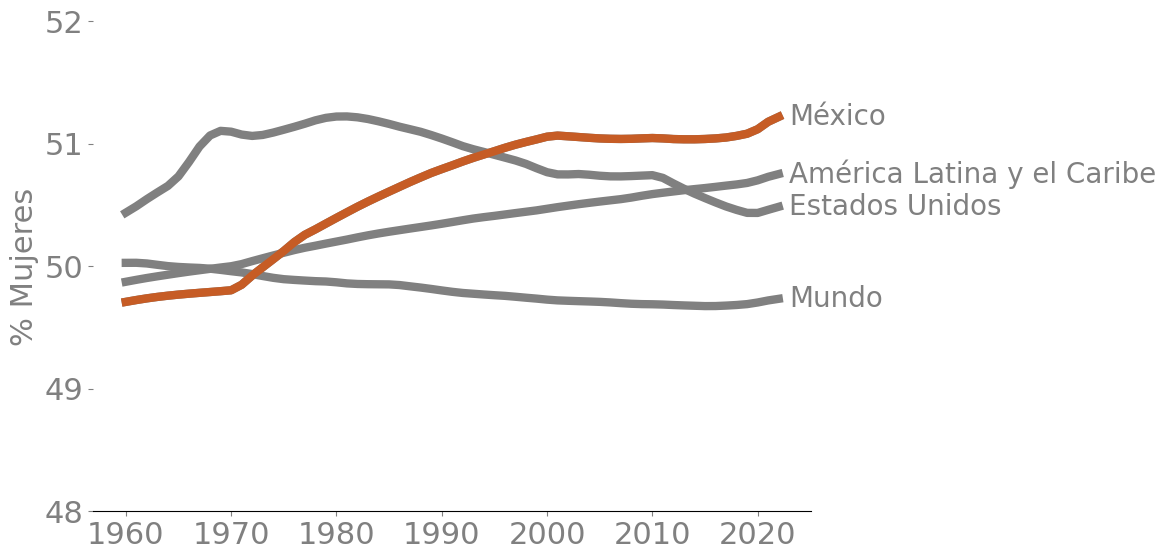

In [31]:
#| label: fig-mujeres-mundo
#| fig-cap: 


paises = mundo.columns
fig, ax = plt.subplots()

for pais in paises:
    ax.plot(mundo[pais])
    ax.text(mundo[pais].index[-1] + 1,mundo[pais].iloc[-1], pais, ha='left', va='center')

    
ax.plot(mundo['México'],color=doradoier)
    
ax.set_ylim(48,52)


ax.set_ylabel('% Mujeres')
ax.xaxis.set_major_locator( MultipleLocator(10))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig('images/mujeres.png')

In [30]:
f = '../data/001_mujeres/c03 pobesc total.xls'
data = pd.read_excel(f,skiprows=5,nrows=2)

# Derretir el DataFrame para tener los años como filas
data_melted = data.melt(id_vars=['Unnamed: 0'], var_name='Year', value_name='Value')

# Pivotear para obtener el porcentaje de mujeres como columnas
unam = data_melted.pivot(index='Year', columns='Unnamed: 0', values='Value')

# Limpiar los nombres de las figuras para que solo muestren el último año (últimos 4 caracteres)
unam = unam.rename(index=lambda x: x.split('-')[-1])
del unam['Población escolar total']
unam.index = unam.index.astype(int)
unam = unam*100
unam['% mujeres']

Year
2000    49.891077
2001    50.335280
2002    50.614575
2003    50.941182
2004    51.442542
2005    51.468533
2006    51.242303
2007    51.300000
2008    51.300000
2009    51.400000
2010    51.400000
2011    51.400000
2012    51.100000
2013    51.100000
2014    51.100000
2015    51.100000
2016    50.850000
2017    50.901616
2018    51.110000
2019    51.110000
2020    51.500000
2021    51.480000
2022    51.480000
2023    51.480000
Name: % mujeres, dtype: float64

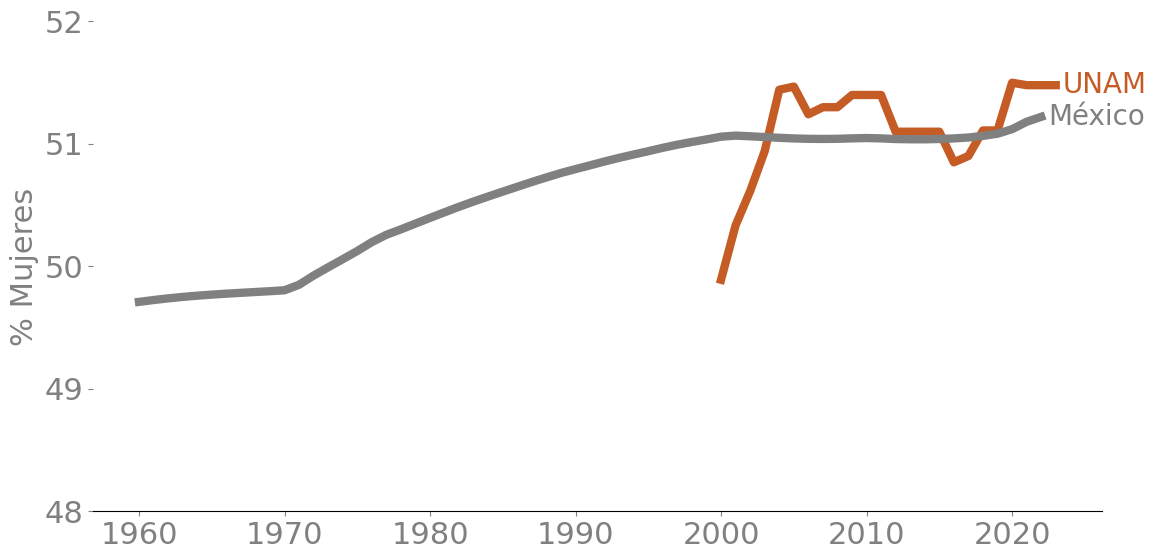

In [29]:
#| label: fig-unam
#| fig-cap: 


fig, ax = plt.subplots()

ax.plot(unam,color=doradoier)
ax.text(unam.index[-1] + .5 ,unam['% mujeres'].iloc[-1], 'UNAM', ha='left', va='center',color=doradoier)

ax.plot(mundo['México'])
ax.text(mundo.index[-1] + .5 ,mundo['México'].iloc[-1], 'México', ha='left', va='center')
    
    
ax.set_ylim(48,52)


ax.set_ylabel('% Mujeres')
ax.xaxis.set_major_locator( MultipleLocator(10))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig('images/unam.png')